Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline


Load the dataset

In [2]:
df = pd.read_csv('D:\SEMO\Data Mining\Diabetes Classification\diabetes_data.csv')

Exploratory Data Analysis

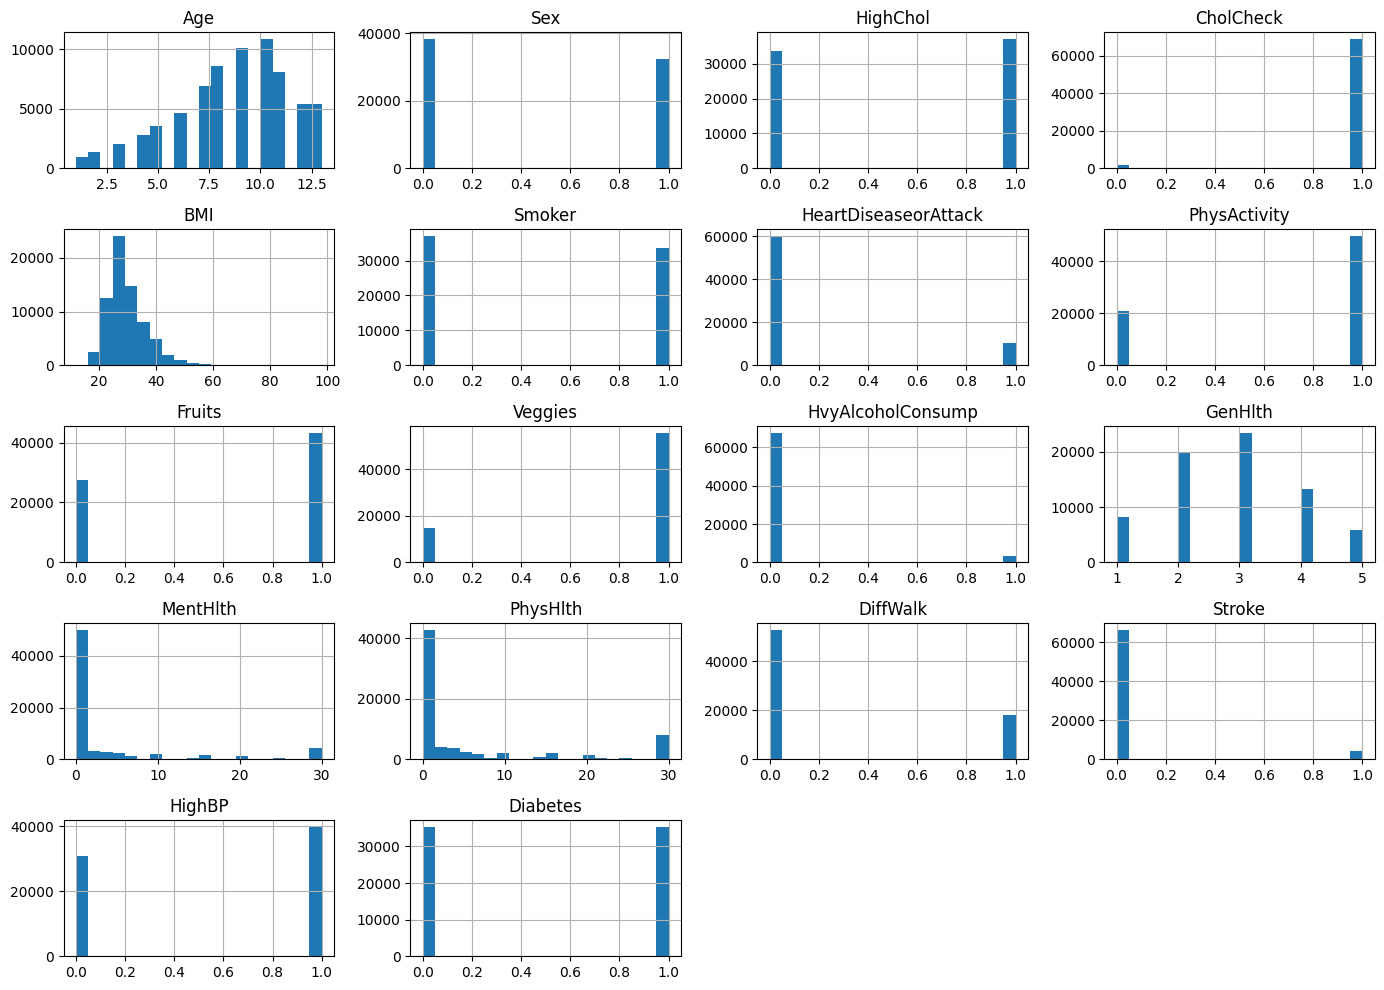

In [3]:
# Histograms for numerical features
df.hist(bins=20, figsize=(14,10))
plt.tight_layout()
plt.show()

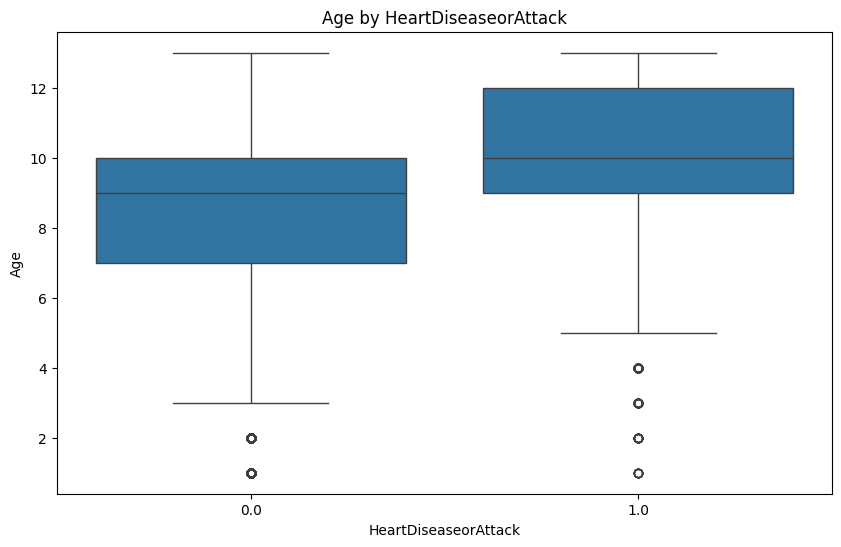

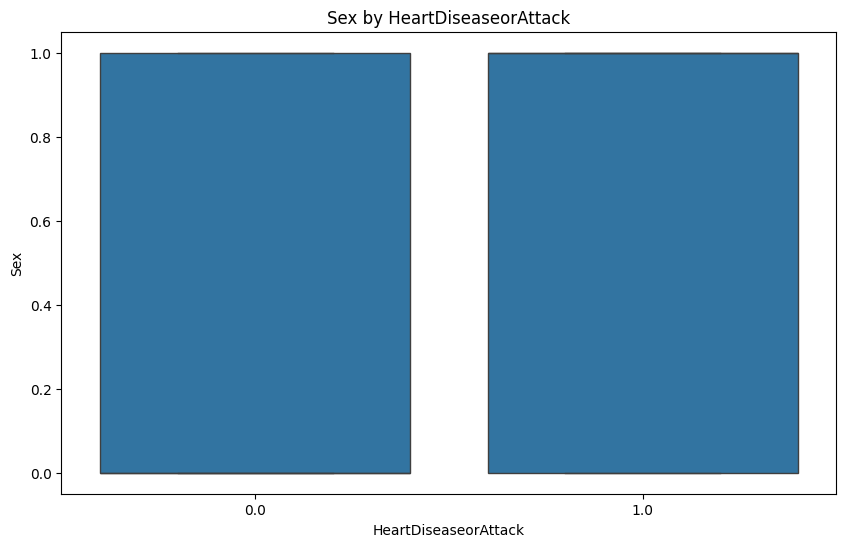

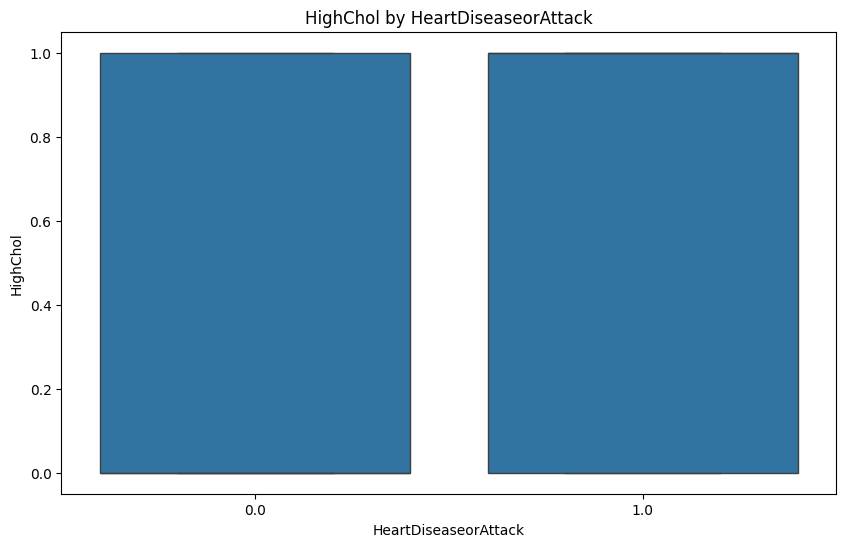

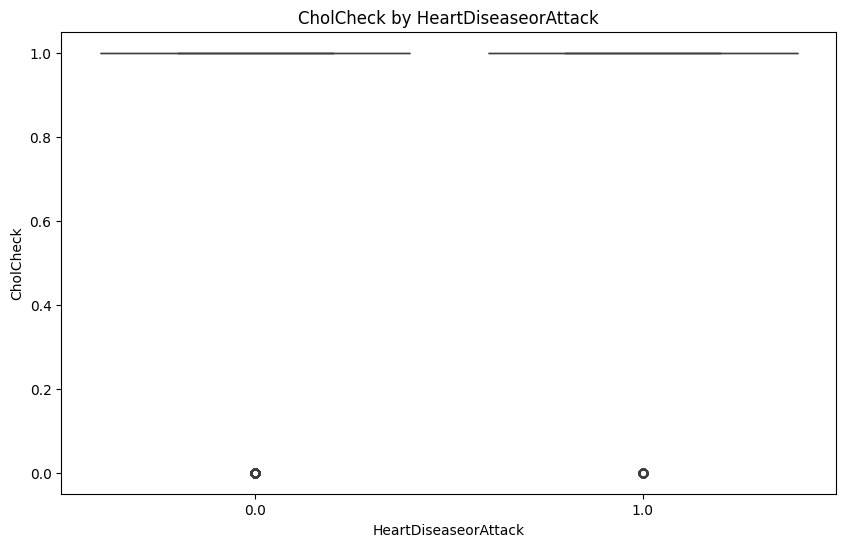

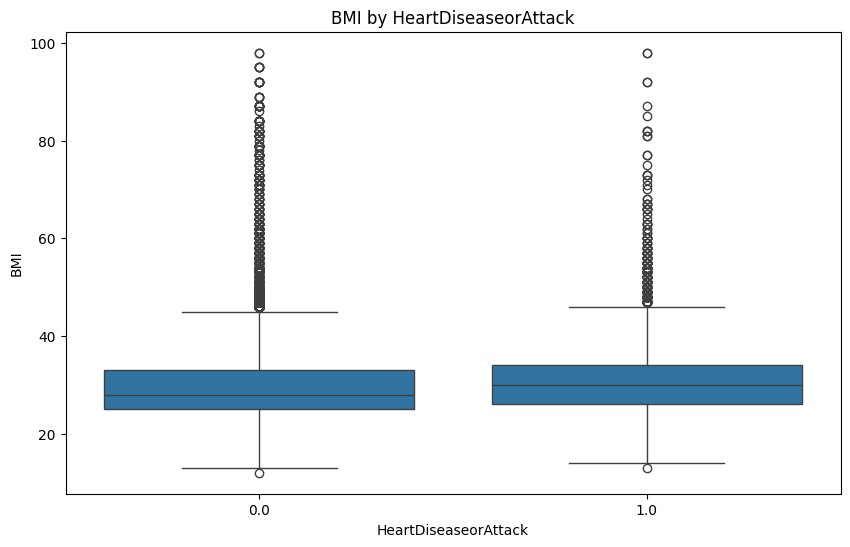

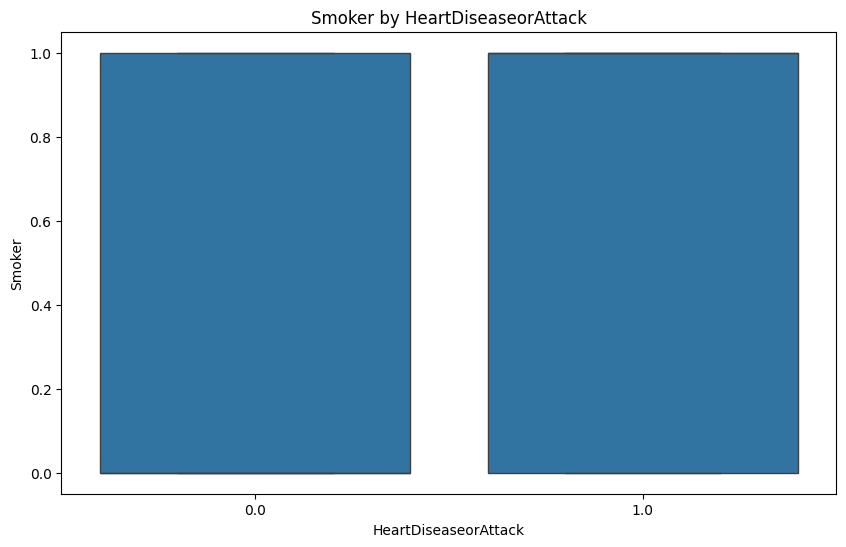

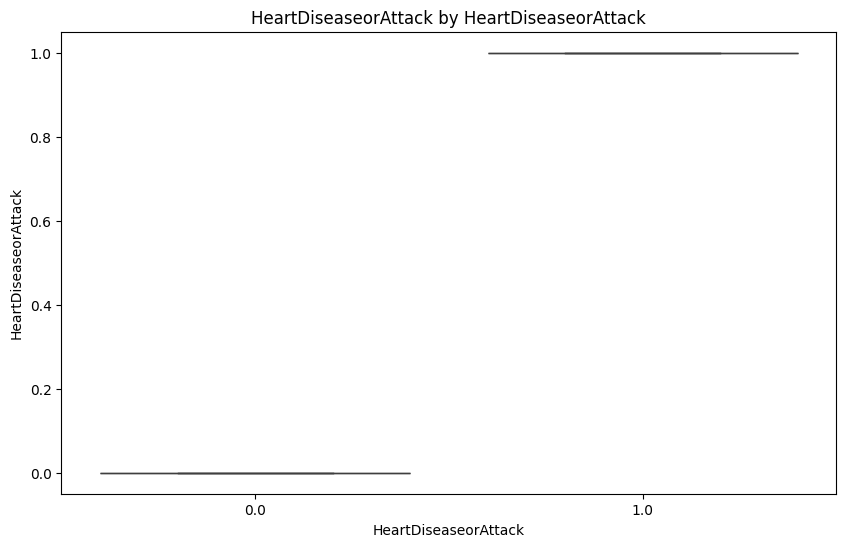

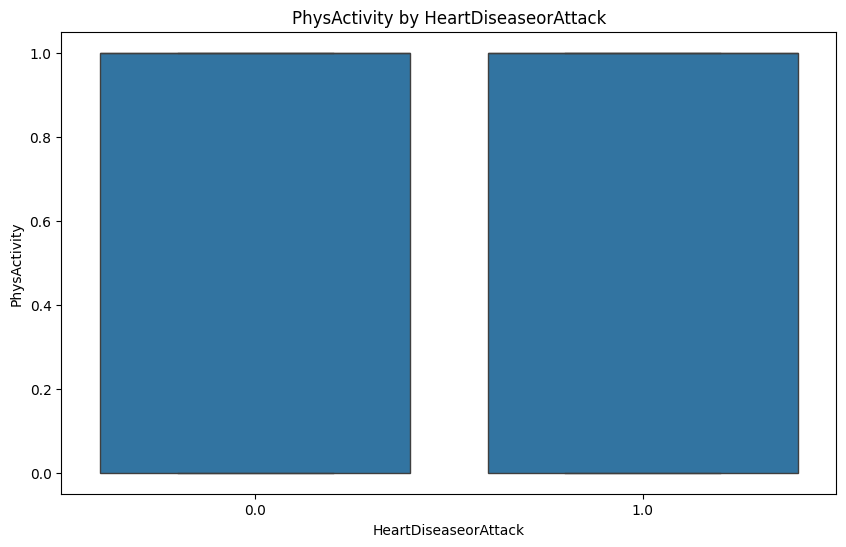

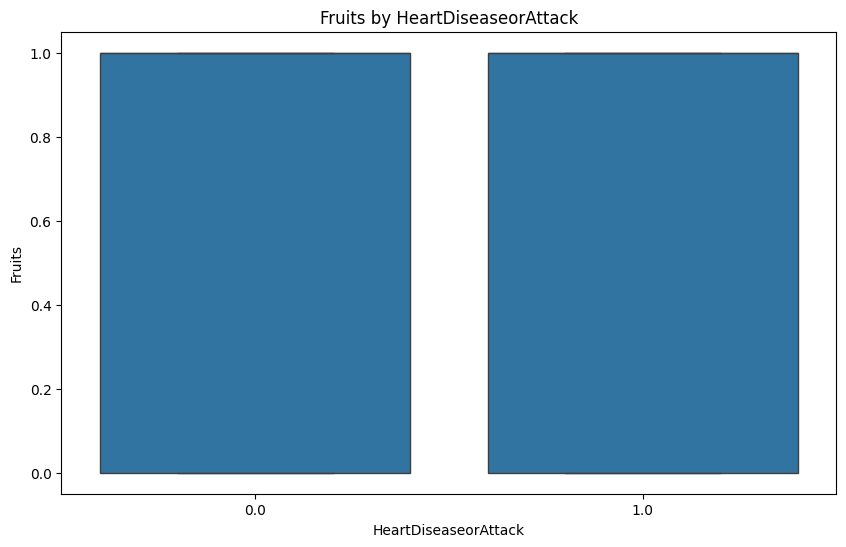

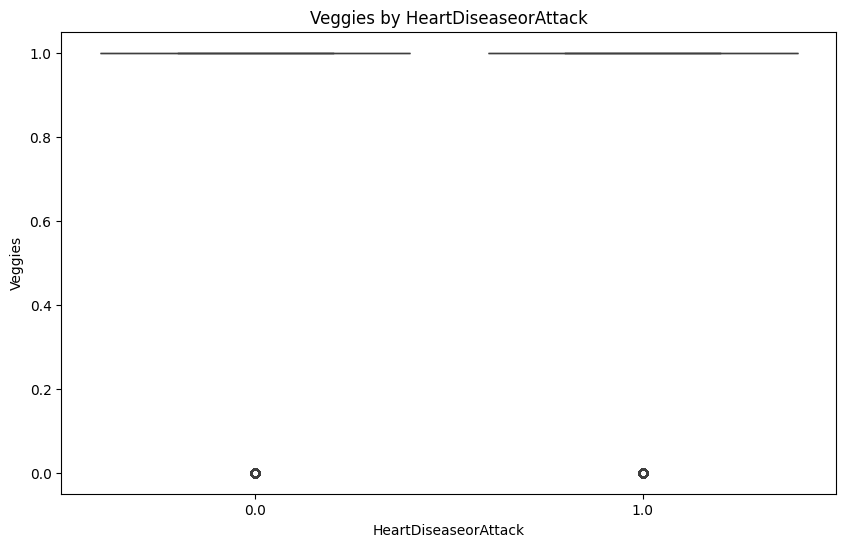

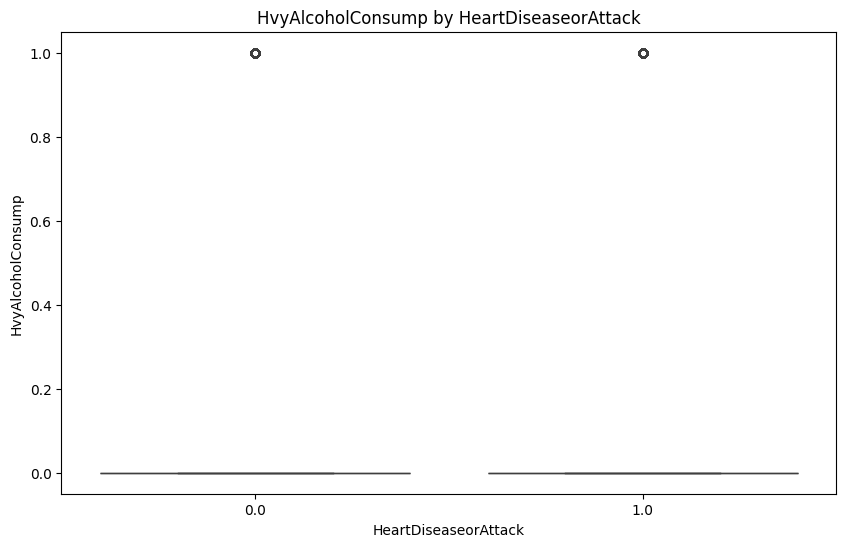

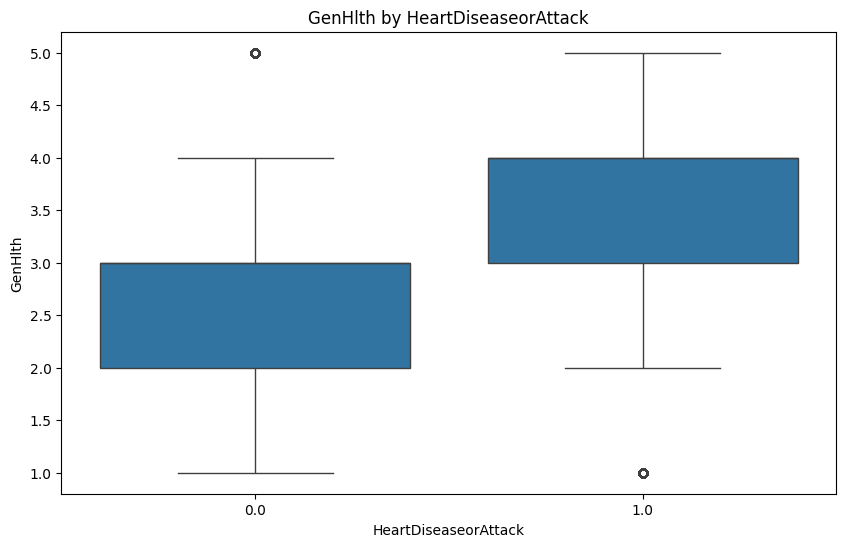

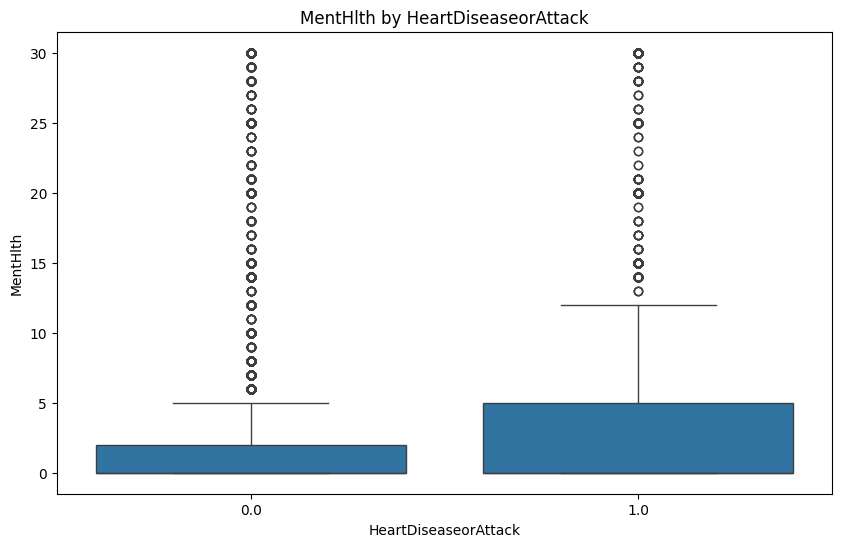

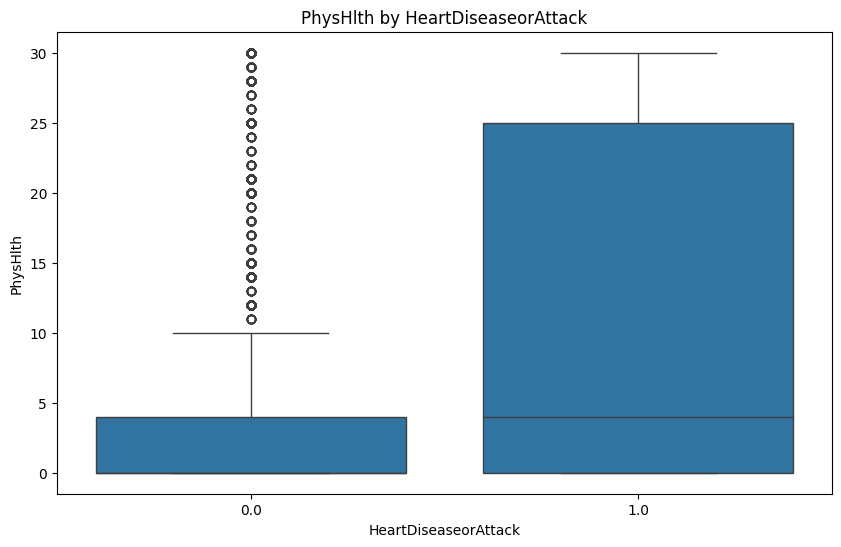

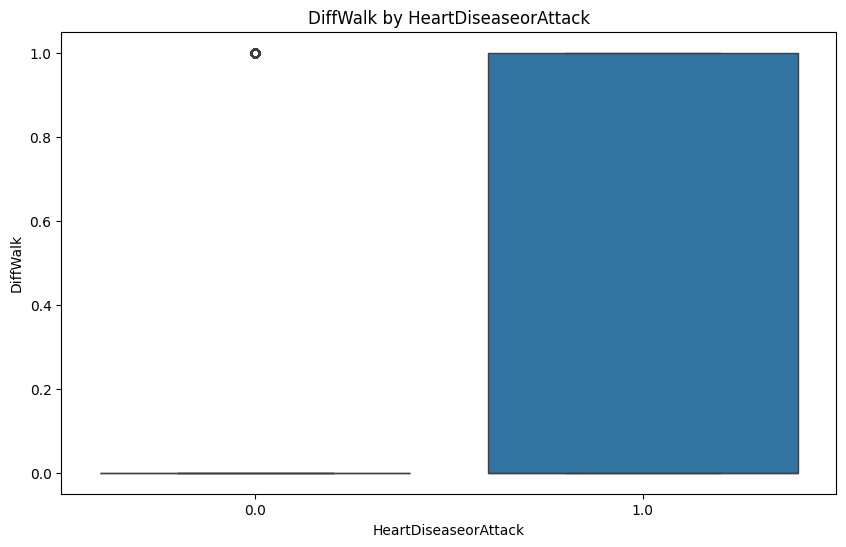

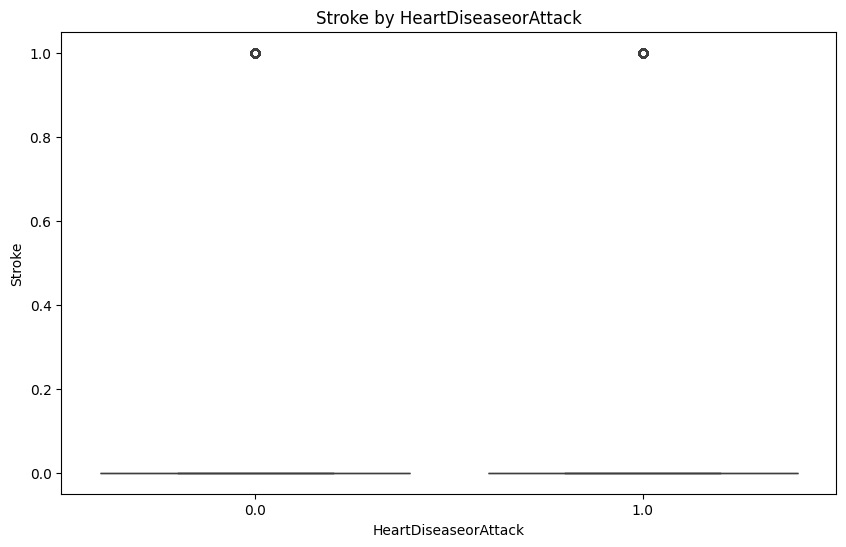

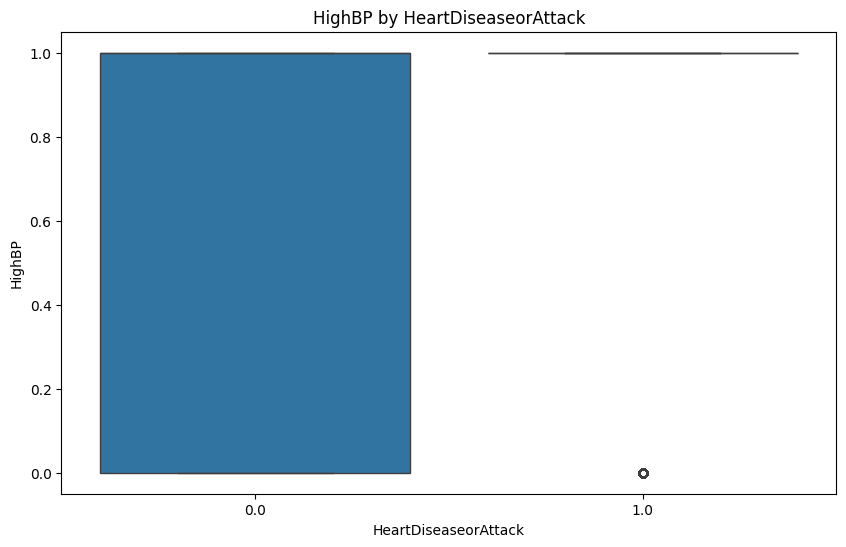

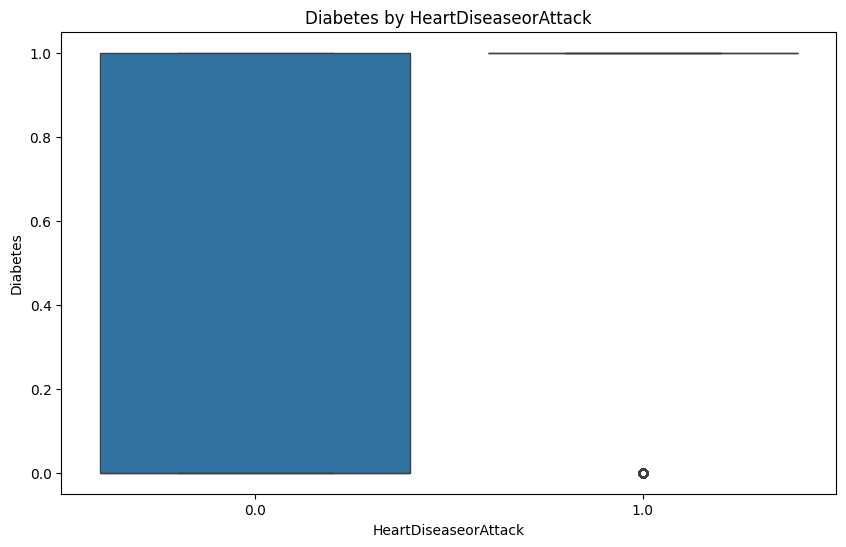

In [4]:
# Box plots for numerical features by target variable
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='HeartDiseaseorAttack', y=feature, data=df)
    plt.title(f'{feature} by HeartDiseaseorAttack')
    plt.show()

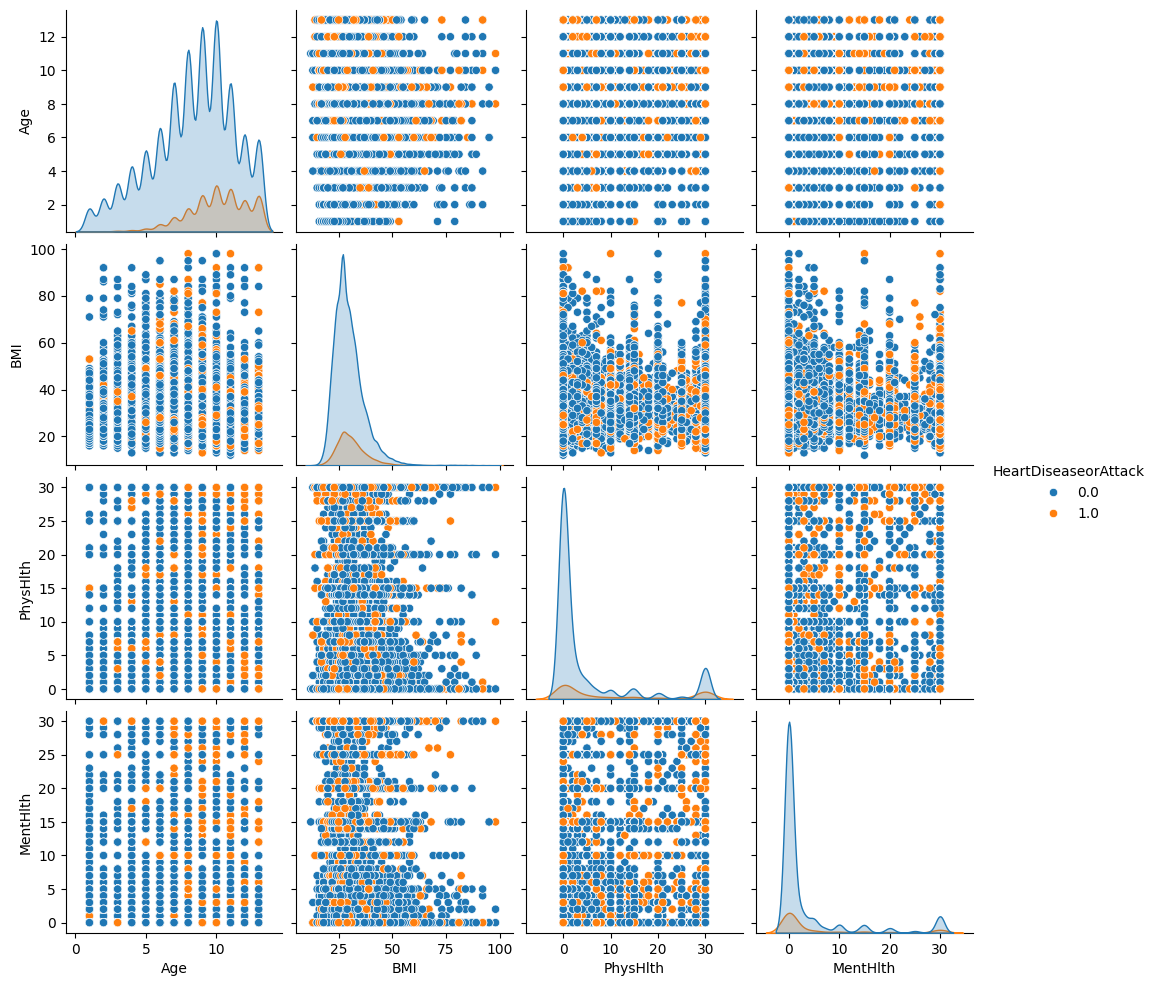

In [5]:
# Pairplot for selected features
sns.pairplot(df, vars=['Age', 'BMI', 'PhysHlth', 'MentHlth'], hue='HeartDiseaseorAttack')
plt.show()


In [6]:
# Convert categorical variables to numerical
df = pd.get_dummies(df)


In [7]:
# Fill missing values with the mean of the column
df.fillna(df.mean(), inplace=True)


In [9]:
# Feature Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('HeartDiseaseorAttack', axis=1))


In [10]:
# Split the dataset into features and target
X = scaled_features
y = df['HeartDiseaseorAttack']


Split the data into training and testing sets

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(probability=True),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

In [13]:
def train_and_evaluate(models, X_train, y_train, X_test, y_test):
    for name, model in models.items():
        print(f'Training {name}...')
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:,1]

In [15]:
# Assuming 'models' is a dictionary of model names and their respective initialized objects.
# Also assuming that 'X_train', 'X_test', 'y_train', and 'y_test' have been defined previously.

for name, model in models.items():
    # Training the model
    model.fit(X_train, y_train)
    
    # Making predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    # Evaluating the model
    print(f'Evaluating {name}...')
    print(classification_report(y_test, y_pred))
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print('ROC AUC Score:', roc_auc_score(y_test, y_proba))
    print('------------------------------------------------------')


Evaluating Logistic Regression...
              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92     17997
         1.0       0.59      0.18      0.28      3211

    accuracy                           0.86     21208
   macro avg       0.73      0.58      0.60     21208
weighted avg       0.83      0.86      0.82     21208

Confusion Matrix:
[[17587   410]
 [ 2633   578]]
ROC AUC Score: 0.8198003241725104
------------------------------------------------------
Evaluating Decision Tree...
              precision    recall  f1-score   support

         0.0       0.88      0.87      0.87     17997
         1.0       0.31      0.32      0.31      3211

    accuracy                           0.79     21208
   macro avg       0.59      0.60      0.59     21208
weighted avg       0.79      0.79      0.79     21208

Confusion Matrix:
[[15628  2369]
 [ 2170  1041]]
ROC AUC Score: 0.5997261265403121
------------------------------------------------------
Evaluati

In [16]:
train_and_evaluate(models, X_train, y_train, X_test, y_test)

Training Logistic Regression...
Training Decision Tree...
Training Random Forest...
Training Support Vector Machine...
Training K-Nearest Neighbors...
Training Naive Bayes...


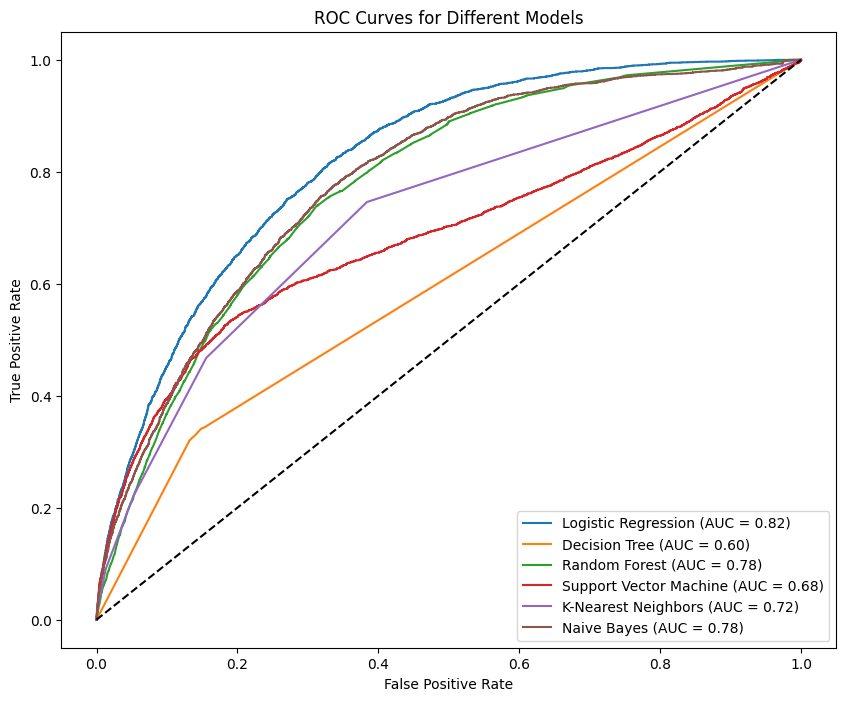

In [18]:
plt.figure(figsize=(10, 8))
for name, model in models.items():
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_proba):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend(loc='lower right')
plt.show()


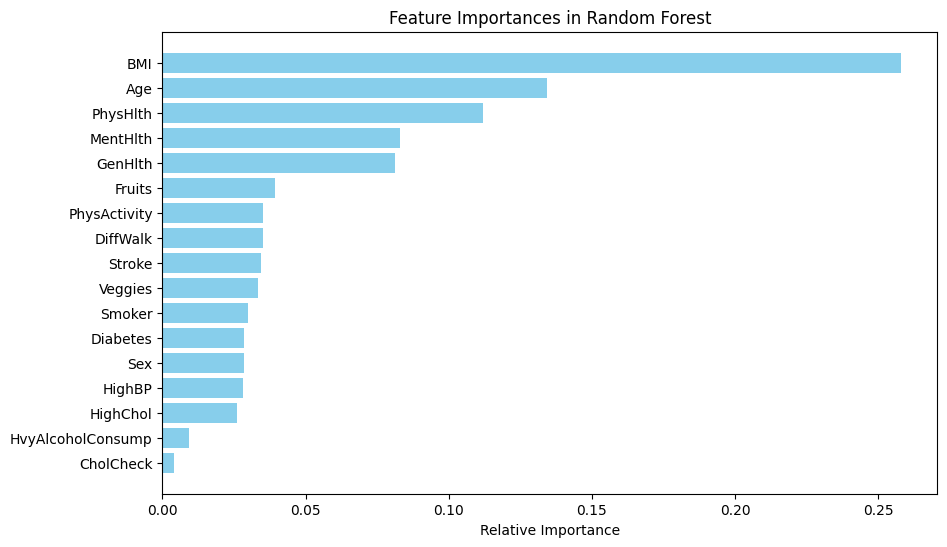

In [21]:
# Assuming 'df' is your original DataFrame and 'HeartDiseaseorAttack' is the target column.

# Save the column names before scaling
feature_names = df.drop('HeartDiseaseorAttack', axis=1).columns

# Continue with your existing feature scaling and model training process...

# Feature importance for Random Forest (assuming it's one of the models)
importances = models['Random Forest'].feature_importances_
indices = np.argsort(importances)

# Now use 'feature_names' for the plot
plt.figure(figsize=(10, 6))
plt.title('Feature Importances in Random Forest')
plt.barh(range(len(indices)), importances[indices], align='center', color='skyblue')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

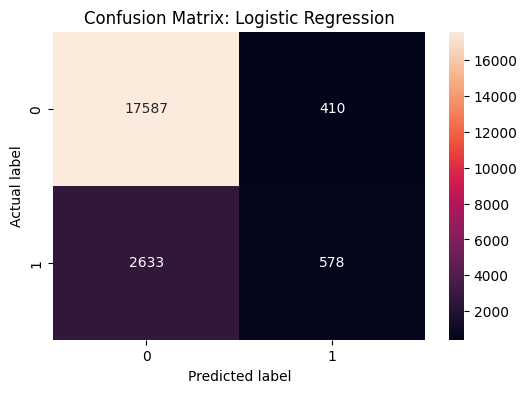

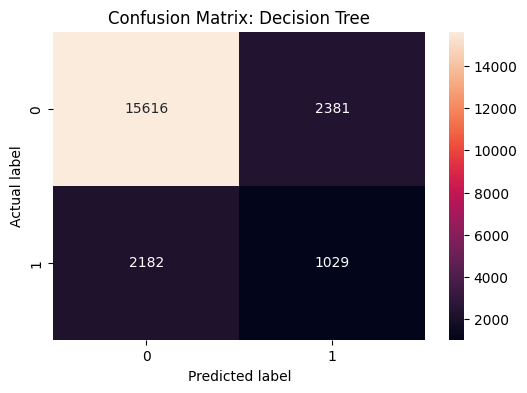

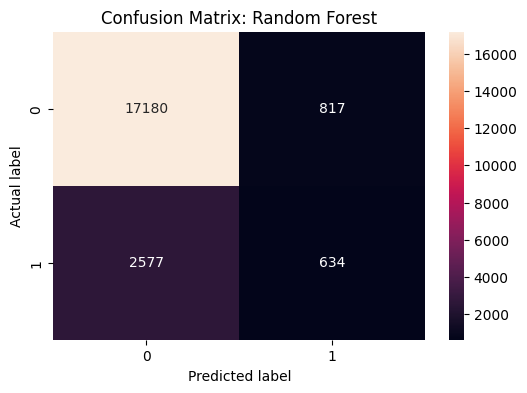

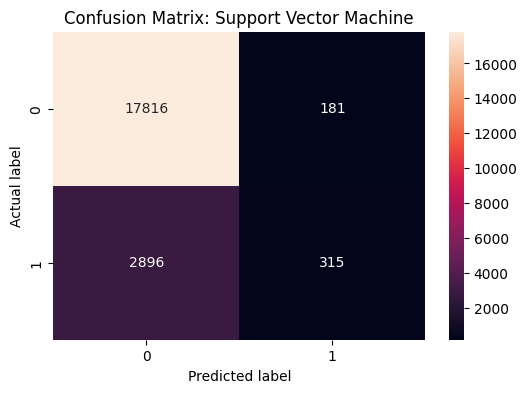

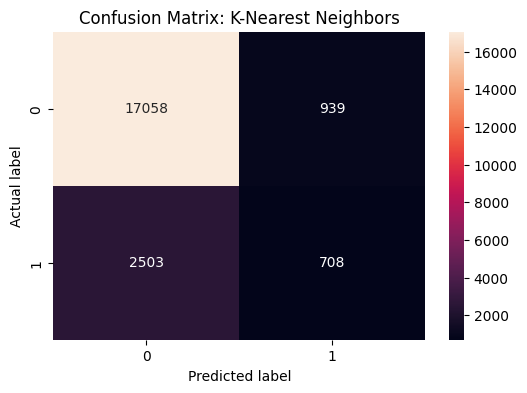

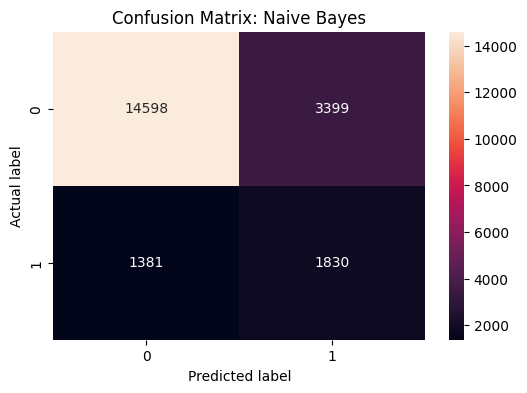

In [20]:
for name, model in models.items():
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_test, model.predict(X_test)), annot=True, fmt="d")
    plt.title(f'Confusion Matrix: {name}')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()